# Sentiment Analysis with VADER in Python

## Introduction

Sentiment analysis is a powerful tool in text analysis, allowing us to determine the emotional tone behind words. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is used to identify the polarity (positive/negative) of a given text, providing a quantitative measure of its emotional content.

## Setup

Before we start, ensure you have the VADER library installed. If not, you can install it using pip:

```python
!pip install vaderSentiment
```

In [3]:
!pip install --user vaderSentiment

  Using cached https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl


In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### Example 1: Simple Sentiment Analysis

Let's start with a simple example to analyze the sentiment of a positive sentence:

In [5]:
analyzer = SentimentIntensityAnalyzer()
sentence = "I love sunny days in Sydney!"
scores = analyzer.polarity_scores(sentence)
print(scores)

{'neg': 0.0, 'neu': 0.354, 'pos': 0.646, 'compound': 0.807}


### Example 2: Handling Negation

VADER is intelligent enough to understand the negation in sentences. Let's see how it handles a negated sentence

In [6]:
sentence = "I don't like rainy days."
scores = analyzer.polarity_scores(sentence)
print(scores)

{'neg': 0.333, 'neu': 0.474, 'pos': 0.193, 'compound': -0.2235}


### Example 3: Analyzing a More Complex Sentence

Now, let's analyze a more complex sentence that might contain mixed sentiments:

In [7]:
sentence = "The meeting was long and boring, but the outcome was fantastic!"
scores = analyzer.polarity_scores(sentence)
print(scores)

{'neg': 0.104, 'neu': 0.568, 'pos': 0.328, 'compound': 0.6749}


### Example 4: Comparative Analysis of Multiple Sentences

Comparing sentiments across different sentences can provide insights into the varying emotional tones:

In [8]:
sentences = [
    "I love sunny days in Sydney!",
    "The meeting was long and boring.",
    "Absolutely fantastic! This new algorithm performs beyond my expectations."
]

for sentence in sentences:
    scores = analyzer.polarity_scores(sentence)
    print(f"'{sentence}'\n{scores}\n")

'I love sunny days in Sydney!'
{'neg': 0.0, 'neu': 0.354, 'pos': 0.646, 'compound': 0.807}

'The meeting was long and boring.'
{'neg': 0.315, 'neu': 0.685, 'pos': 0.0, 'compound': -0.3182}

'Absolutely fantastic! This new algorithm performs beyond my expectations.'
{'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'compound': 0.6352}



### Example 5: Visualizing Sentiment Scores

Visualizing the sentiment scores of a sentence can help in better understanding the distribution of sentiments:

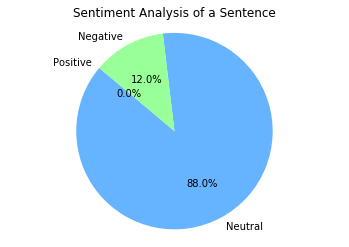

In [10]:
import matplotlib.pyplot as plt

sentence = "Despite the challenges, the team displayed exceptional resilience and dedication."
scores = analyzer.polarity_scores(sentence)

labels = ['Positive', 'Neutral', 'Negative']
sizes = [scores['pos'], scores['neu'], scores['neg']]
colors = ['#ff9999','#66b3ff','#99ff99']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.title("Sentiment Analysis of a Sentence")
plt.show()

For a more advanced example, let's consider a scenario where we perform sentiment analysis on multiple sentences individually and then compare these sentiment scores visually using a bar chart. This will not only show us the sentiment of each sentence but also allow us to easily compare the sentiments across sentences. I'll outline a Python script for you that does the following:

1. Performs sentiment analysis on each sentence in a list of sentences using VADER.
2. Extracts the compound scores (which represent the overall sentiment) for each sentence.
3. Plots these compound scores on a bar chart to visually compare the sentiment across sentences.

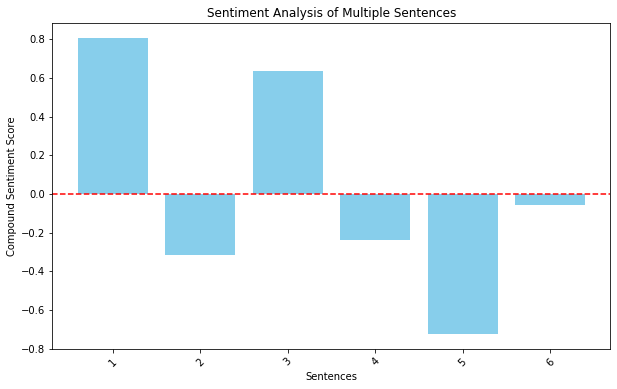

In [11]:
# Import necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# List of sentences to analyze
sentences = [
    "I love sunny days in Sydney!",
    "The meeting was long and boring.",
    "Absolutely fantastic! This new algorithm performs beyond my expectations.",
    "I'm not sure how I feel about the new policy.",
    "Sadly, the project failed to deliver the expected results.",
    "Despite the challenges, the team displayed exceptional resilience and dedication."
]

# Perform sentiment analysis on each sentence and store the compound scores
compound_scores = []
for sentence in sentences:
    scores = analyzer.polarity_scores(sentence)
    compound_scores.append(scores['compound'])

# Plotting
plt.figure(figsize=(10, 6))
# Create a bar chart with sentences on the X-axis and compound scores on the Y-axis
plt.bar(range(len(sentences)), compound_scores, color='skyblue')
plt.xlabel('Sentences')
plt.ylabel('Compound Sentiment Score')
plt.title('Sentiment Analysis of Multiple Sentences')
plt.xticks(range(len(sentences)), range(1, len(sentences) + 1), rotation=45)
plt.axhline(0, color='red', linestyle='--')  # Add a line to mark the neutral sentiment score (0)
plt.show()


### Explanation

- **Sentiment Analysis**: Each sentence is analyzed using VADER to determine its sentiment. The compound score, which ranges from -1 (most negative) to +1 (most positive), is extracted for each sentence.
- **Plotting**: We plot these compound scores on a bar chart, where each bar represents a sentence. The height of the bar indicates the sentiment score: higher bars for positive sentiments, lower bars for negative sentiments, and bars around the middle line for neutral sentiments.
- **Visual Comparison**: The bar chart makes it easy to compare the overall sentiment of each sentence at a glance. The red dashed line at y=0 helps in distinguishing between sentences with positive, negative, and neutral sentiments.

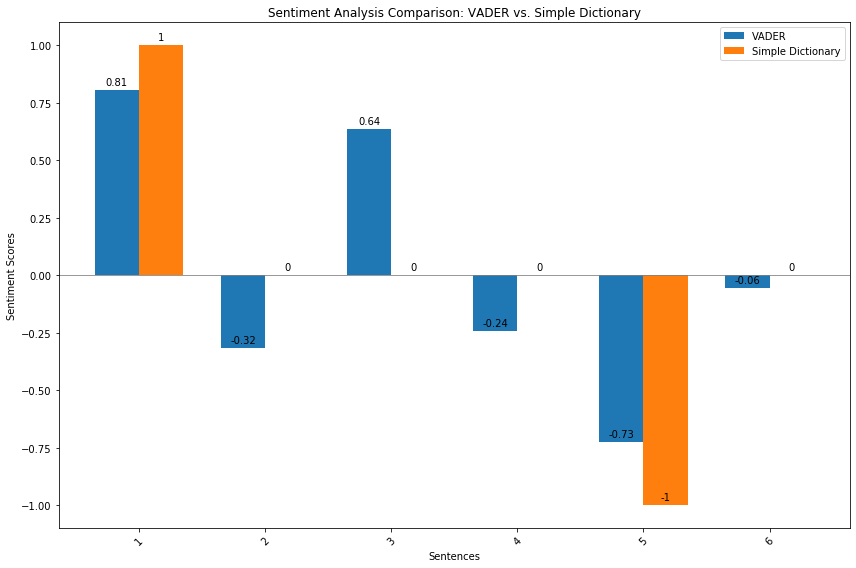

In [12]:
# Import necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Simple dictionary-based sentiment analyzer
positive_words = ['love', 'fantastic', 'happy', 'joy', 'positive', 'successful', 'enjoy', 'like', 'wonderful']
negative_words = ['hate', 'boring', 'sad', 'negative', 'failed', 'dislike', 'bad', 'poorly']

def simple_sentiment_analysis(sentence):
    words = sentence.lower().split()
    score = 0
    for word in words:
        if word in positive_words:
            score += 1
        elif word in negative_words:
            score -= 1
    return score

# List of sentences to analyze
sentences = [
    "I love sunny days in Sydney!",
    "The meeting was long and boring.",
    "Absolutely fantastic! This new algorithm performs beyond my expectations.",
    "I'm not sure how I feel about the new policy.",
    "Sadly, the project failed to deliver the expected results.",
    "Despite the challenges, the team displayed exceptional resilience and dedication."
]

# Perform sentiment analysis using both methods and store the scores
vader_scores = []
simple_scores = []
for sentence in sentences:
    vader_scores.append(analyzer.polarity_scores(sentence)['compound'])
    simple_scores.append(simple_sentiment_analysis(sentence))

# Plotting
ind = np.arange(len(sentences))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(ind - width/2, vader_scores, width, label='VADER')
rects2 = ax.bar(ind + width/2, simple_scores, width, label='Simple Dictionary')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Sentences')
ax.set_ylabel('Sentiment Scores')
ax.set_title('Sentiment Analysis Comparison: VADER vs. Simple Dictionary')
ax.set_xticks(ind)
ax.set_xticklabels(range(1, len(sentences) + 1), rotation=45)
ax.axhline(0, color='grey', lw=0.8)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


## Pre-defined lists of positive and negative words

You can use existing lists of positive and negative words for sentiment analysis without having to manually define them. The Natural Language Toolkit (NLTK) library includes various resources, one of which is a corpus of positive and negative words. However, it's important to note that while NLTK provides a vast array of linguistic resources, it does not include a dedicated list of positive and negative words by default in the same way it provides stopwords. Instead, such lists are often found in external resources or datasets.

We will use the Opinion Lexicon from NLTK, which requires downloading the `opinion_lexicon` corpus, or other external resources such as the Hu and Liu sentiment lexicon.

In [14]:
!pip install --user nltk
import nltk

C:\Software\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/dev

In [15]:
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\129895\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\opinion_lexicon.zip.


True

In [16]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # For tokenization

# Update the simple sentiment analysis function to use NLTK's lists
def simple_sentiment_analysis_nltk(sentence):
    positive_words = set(opinion_lexicon.positive())
    negative_words = set(opinion_lexicon.negative())
    
    score = 0
    for word in word_tokenize(sentence.lower()):
        if word in positive_words:
            score += 1
        elif word in negative_words:
            score -= 1
    return score

# Assuming the rest of the code remains the same, update the part where you calculate simple scores:
simple_scores_nltk = [simple_sentiment_analysis_nltk(sentence) for sentence in sentences]

# When plotting, replace `simple_scores` with `simple_scores_nltk` to reflect the scores obtained using NLTK's lexicon.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\129895\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


### Complete implementations

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\129895\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\129895\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


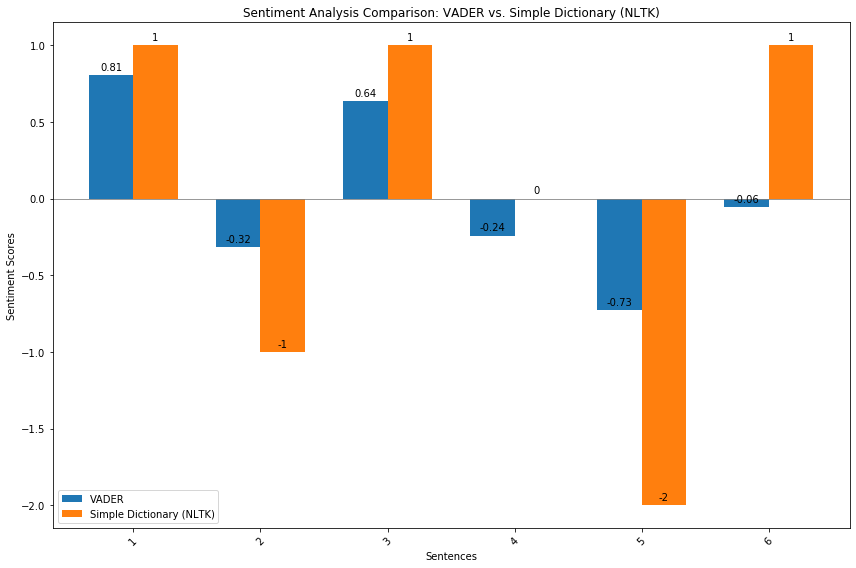

In [20]:
# Import necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

# Ensure NLTK resources are available
nltk.download('opinion_lexicon')
nltk.download('punkt')

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Simple sentiment analysis function using NLTK's opinion lexicon
def simple_sentiment_analysis_nltk(sentence):
    positive_words = set(opinion_lexicon.positive())
    negative_words = set(opinion_lexicon.negative())
    tokens = word_tokenize(sentence.lower())
    score = 0
    for word in tokens:
        if word in positive_words:
            score += 1
        elif word in negative_words:
            score -= 1
    
    # Normalization: Divide the score by the total number of tokens to ensure it ranges from -1 to +1
    # Use max to avoid division by zero for very short sentences
    #score = score / max(len(tokens), 1)
    return score

# List of sentences to analyze
sentences = [
    "I love sunny days in Sydney!",
    "The meeting was long and boring.",
    "Absolutely fantastic! This new algorithm performs beyond my expectations.",
    "I'm not sure how I feel about the new policy.",
    "Sadly, the project failed to deliver the expected results.",
    "Despite the challenges, the team displayed exceptional resilience and dedication."
]

# Perform sentiment analysis using both methods and store the scores
vader_scores = []
simple_scores_nltk = []
for sentence in sentences:
    vader_scores.append(analyzer.polarity_scores(sentence)['compound'])
    simple_scores_nltk.append(simple_sentiment_analysis_nltk(sentence))

# Plotting
ind = np.arange(len(sentences))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(ind - width/2, vader_scores, width, label='VADER')
rects2 = ax.bar(ind + width/2, simple_scores_nltk, width, label='Simple Dictionary (NLTK)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Sentences')
ax.set_ylabel('Sentiment Scores')
ax.set_title('Sentiment Analysis Comparison: VADER vs. Simple Dictionary (NLTK)')
ax.set_xticks(ind)
ax.set_xticklabels(range(1, len(sentences) + 1), rotation=45)
ax.axhline(0, color='grey', lw=0.8)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


What is the problem with the graph above?

## Conclusion

In this notebook, we explored how to perform sentiment analysis using the VADER library in Python, from simple to more complex examples. VADER's ability to understand context and nuance in text makes it a powerful tool for analyzing sentiments across various texts. Further exploration can include analyzing texts from social media feeds or customer reviews to gain insights into public sentiment on different topics.